# Open Intelligence, Performance AI interview case

## Ousmane Diop
## January, 2025

# Project Outline

1. **Data Exploration**
   - a. Provide a high-level overview of the dataset.
   - b. Identify any anomalies, missing data, or inconsistencies, and describe how you address them.
   - c. Visualize the data to uncover patterns, distributions, or correlations that could impact the CTR.

2. **Feature Engineering**
   - a. Justify your choice of features and any transformations applied.

3. **Modeling**
   - a. Train at least one regression model to predict CTR.
   - b. Compare different modeling approaches if time allows (e.g., Random Forest, Gradient Boosting, or Linear Regression).
   - c. Evaluate model performance using appropriate metrics.

4. **Code Quality**
   - a. Ensure your code is modular, well-documented, and easy to follow.
   - b. Where appropriate, include comments to explain key decisions or assumptions.


# Data Loading ...

In [52]:
import pandas as pd

data_path = "pai-test-data.zip"  # Path to the zip file data
data = pd.read_csv(data_path, sep="\t", compression='zip')
data.columns # the name of the columns

Index(['DeliveryDateKey', 'PlatformLineItemName', 'CreativeKey',
       'PlatformPosition', 'PublisherPlatform', 'AdvertiserAccountKey',
       'AccountId', 'AccountName', 'AdId', 'AdName', 'AdsetId', 'AdsetName',
       'CampaignId', 'CampaignName', 'PlatformCampaignKey',
       'PlatformAdvertiserKey', 'OptimizationGoal', 'GeoTargeting', 'AgeMax',
       'AgeMin', 'GenderType', 'ParentalStatus', 'Interests', 'Advertiser',
       'AdvertiserMarket', 'AdvertiserRegion', 'Agency', 'GroupAdvertiser',
       'GroupAgency', 'OperationUnit', 'OperationUnitMarket',
       'OperationUnitRegion', 'PlatformExternalCampaignName',
       'campaign_end_date', 'campaign_start_date', 'campaign_active',
       'TotalPlatformCost', 'TotalImpressions', 'TotalClicks',
       'TotalViewMeasurable', 'TotalViewable', 'TotalViewTrackable',
       'TotalClientEligibleImpressions', 'TotalClientMeasurableImpressions',
       'TotalPlatformViewMeasurable', 'TotalPlatformViewTrackable',
       'TotalPlatformView

In [53]:
data.head()

,DeliveryDateKey,PlatformLineItemName,CreativeKey,PlatformPosition,PublisherPlatform,AdvertiserAccountKey,AccountId,AccountName,AdId,AdName,...,TotalVideoContinuous2SecWatched,Total25PercentViewed,Total50PercentViewed,Total75PercentViewed,Total100PercentViewed,TotalReach,TotalConversions,TotalPlatformSpend,InterestsList,is_video
0,2025-01-01,Line Item 94,4216,INSTREAM_VIDEO,TikTok,7965,7663,Account Rodriguez-Miller,4683,Ad 92,...,0,0,0,0,0,0,13,434.58,"{list:[{element:'Gaming'},{element:'Sports'}]}",True
1,2024-12-06,Line Item 66,1626,RIGHT_HAND_SIDE,Twitter,1742,6891,Account Andrade-Mendoza,7541,Ad 17,...,0,0,0,0,0,0,505,461.10,"{list:[{element:'Gaming'},{element:'Beauty'}]}",True
2,2024-12-07,Line Item 58,6955,RIGHT_HAND_SIDE,Facebook,2114,9620,"Account Gomez, Stewart and Walker",1008,Ad 74,...,0,0,0,0,0,0,406,377.83,"{list:[{element:'Gaming'},{element:'Technology...",True
3,2024-12-21,Line Item 87,4343,INSTREAM_VIDEO,Facebook,4635,7317,Account Martinez PLC,8448,Ad 17,...,0,0,0,0,0,0,34,77.73,"{list:[{element:'Fashion'},{element:'Beauty'}]}",True
4,2025-01-05,Line Item 59,2303,UNKNOWN,Instagram,9449,8200,"Account James, Thomas and Wilson",5913,Ad 86,...,0,0,0,0,0,0,75,296.68,"{list:[{element:'Beauty'},{element:'Beauty'}]}",True


## 1. Data Exploration

## a-Provide a high-level overview of the dataset

In [5]:
import skimpy as skim  # To produce a global summary statistic instead of using the functions .info(), .describe().dtypes(),... 
skim.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100000 │ │ int64       │ 31    │                                                          │
│ │ Number of columns │ 63     │ │ string      │ 26    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CreativeKey            │    0 │      0 │   5503 │   2601 │   1000 │  3242 │  5510 │  7759 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AdvertiserAccountKey   │    0 │      0 │   5490 │   2591 │   1000 │  3247 │  5491 │  7730 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AccountId              │    0 │      0 │   5490 │   2600 │   1000 │  3228 │  5493 │  7744 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AdId                   │    0 │      0 │   5501 │   2591 │   1000 │  3264 │  5500 │  7750 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AdsetId                │    0 │      0 │   5501 │   2595 │   1000 │  3260 │  5504 │  7742 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ CampaignId             │    0 │      0 │   5494 │   2602 │   1000 │  3236 │  5502 │  7744 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ PlatformCampaignKey    │    0 │      0 │   5503 │   2596 │   1000 │  3260 │  5502 │  7748 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ PlatformAdvertiserKey  │    0 │      0 │   5498 │   2597 │   1000 │  3244 │  5498 │  7744 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AgeMax                 │  137 │  0.137 │  47.51 │  10.39 │     30 │    38 │    48 │    57 │    65 │ ▇▇▇▇▇▇ │  │
│ │ AgeMin                 │  137 │  0.137 │  25.48 │  9.395 │     18 │    21 │    24 │    27 │    75 │   ▇▂   │  │
│ │ TotalPlatformCost      │    0 │      0 │  275.9 │  129.8 │  50.01 │ 163.6 │ 276.2 │ 388.7 │   500 │ ▇▇▇▇▇▇ │  │
│ │ TotalImpressions       │    0 │      0 │  27480 │  12980 │   5000 │ 16270 │ 27470 │ 38720 │ 50000 │ ▇▇▇▇▇▇ │  │
│ │ TotalClicks            │    0 │      0 │   2751 │   6689 │    100 │   573 │  1217 │  2277 │ 54640 │   ▇    │  │
│ │ TotalViewMeasurable    │    0 │      0 │  27010 │  12760 │   4913 │ 15980 │ 26990 │ 38050 │ 49140 │ ▇▇▇▇▇▇ │  │
│ │ TotalViewable          │    0 │      0 │  17110 │   8084 │   3112 │ 10130 │ 17100 │ 24110 │ 31130 │ ▇▇▇▇▇▇ │  │
│ │ TotalViewTrackable     │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ TotalClientEligibleImp │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ ressions               │      │        │        │        │        │       │       │       │       │        │  │
│ │ TotalClientMeasurableI │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ mpressions             │      │        │        │        │        │       │       │       │       │        │  │
│ │ TotalPlatformViewMeasu │    0 │      0 │      0 │   

## We could apply the skimpy after separating the dataframes with respect to the data's type. The description is better for numerical values. 

In [202]:
data_numeric=data.select_dtypes(include=["number"])
skim.skim(data_numeric)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100000 │ │ int64       │ 31    │                                                          │
│ │ Number of columns │ 35     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CreativeKey            │    0 │      0 │   5503 │   2601 │   1000 │  3242 │  5510 │  7759 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AdvertiserAccountKey   │    0 │      0 │   5490 │   2591 │   1000 │  3247 │  5491 │  7730 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AccountId              │    0 │      0 │   5490 │   2600 │   1000 │  3228 │  5493 │  7744 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AdId                   │    0 │      0 │   5501 │   2591 │   1000 │  3264 │  5500 │  7750 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AdsetId                │    0 │      0 │   5501 │   2595 │   1000 │  3260 │  5504 │  7742 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ CampaignId             │    0 │      0 │   5494 │   2602 │   1000 │  3236 │  5502 │  7744 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ PlatformCampaignKey    │    0 │      0 │   5503 │   2596 │   1000 │  3260 │  5502 │  7748 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ PlatformAdvertiserKey  │    0 │      0 │   5498 │   2597 │   1000 │  3244 │  5498 │  7744 │  9999 │ ▇▇▇▇▇▇ │  │
│ │ AgeMax                 │  137 │  0.137 │  47.51 │  10.39 │     30 │    38 │    48 │    57 │    65 │ ▇▇▇▇▇▇ │  │
│ │ AgeMin                 │  137 │  0.137 │  25.48 │  9.395 │     18 │    21 │    24 │    27 │    75 │   ▇▂   │  │
│ │ TotalPlatformCost      │    0 │      0 │  275.9 │  129.8 │  50.01 │ 163.6 │ 276.2 │ 388.7 │   500 │ ▇▇▇▇▇▇ │  │
│ │ TotalImpressions       │    0 │      0 │  27480 │  12980 │   5000 │ 16270 │ 27470 │ 38720 │ 50000 │ ▇▇▇▇▇▇ │  │
│ │ TotalClicks            │    0 │      0 │   2751 │   6689 │    100 │   573 │  1217 │  2277 │ 54640 │   ▇    │  │
│ │ TotalViewMeasurable    │    0 │      0 │  27010 │  12760 │   4913 │ 15980 │ 26990 │ 38050 │ 49140 │ ▇▇▇▇▇▇ │  │
│ │ TotalViewable          │    0 │      0 │  17110 │   8084 │   3112 │ 10130 │ 17100 │ 24110 │ 31130 │ ▇▇▇▇▇▇ │  │
│ │ TotalViewTrackable     │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ TotalClientEligibleImp │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ ressions               │      │        │        │        │        │       │       │       │       │        │  │
│ │ TotalClientMeasurableI │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ mpressions             │      │        │        │        │        │       │       │       │       │        │  │
│ │ TotalPlatformViewMeasu │    0 │      0 │      0 │      0 │      0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ rable                  │      │        │        │        │        │       │       │       │       │        │  │
│ │ TotalPlatformViewTrack │    0 │      0 │      0 │   

In [6]:
data_textual=data.select_dtypes(include=["object"])
skim.skim(data_textual)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100000 │ │ string      │ 26    │                                                          │
│ │ Number of columns │ 26     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃     ┃       ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA  ┃ NA %  ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ DeliveryD │   0 │     0 │ 2025-01-0 │ 2025-01-0 │ 2024-12-0 │ 2025-01-3 │        10 │         1 │   100000 │  │
│ │ ateKey    │     │       │ 1         │ 1         │ 4         │ 1         │           │           │          │  │
│ │ PlatformL │   0 │     0 │ Line Item │ Line Item │ Line Item │ Line Item │      11.9 │         3 │   300000 │  │
│ │ ineItemNa │     │       │ 8         │ 100       │ 1         │ 99        │           │           │          │  │
│ │ me        │     │       │           │           │           │           │           │           │          │  │
│ │ PlatformP │   0 │     0 │ UNKNOWN   │ RIGHT_HAN │ INSTREAM_ │ UNKNOWN   │      11.3 │         1 │   100000 │  │
│ │ osition   │     │       │           │ D_SIDE    │ VIDEO     │           │           │           │          │  │
│ │ Publisher │   0 │     0 │ TikTok    │ Instagram │ Facebook  │ Twitter   │       7.5 │         1 │   100000 │  │
│ │ Platform  │     │       │           │           │           │           │           │           │          │  │
│ │ AccountNa │   0 │     0 │ Account   │ Account   │ Account   │ Account   │      24.6 │       3.4 │   339433 │  │
│ │ me        │     │       │ Yu Ltd    │ Cunningha │ Abbott    │ Zuniga-Wi │           │           │          │  │
│ │           │     │       │           │ m,        │ Group     │ lson      │           │           │          │  │
│ │           │     │       │           │ Williams  │           │           │           │           │          │  │
│ │           │     │       │           │ and       │           │           │           │           │          │  │
│ │           │     │       │           │ Blankensh │           │           │           │           │          │  │
│ │           │     │       │           │ ip        │           │           │           │           │          │  │
│ │ AdName    │   0 │     0 │ Ad 6      │ Ad 100    │ Ad 1      │ Ad 99     │      4.92 │         2 │   200000 │  │
│ │ AdsetName │   0 │     0 │ Ad Set 7  │ Ad Set    │ Ad Set 1  │ Ad Set 99 │      8.92 │         3 │   300000 │  │
│ │           │     │       │           │ 100       │           │           │           │           │          │  │
│ │ CampaignN │   0 │     0 │ Campaign  │ Campaign  │ Campaign  │ Campaign  │      10.9 │         2 │   200000 │  │
│ │ ame       │     │       │ 7         │ 100       │ 1         │ 99        │           │           │          │  │
│ │ Optimizat │   0 │     0 │ REACH     │ BRAND_AWA │ BR

In [204]:
data_bool=data.select_dtypes(include=["bool"])
skim.skim(data_bool)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100000 │ │ bool        │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                   ┃ true            ┃ true rate                 ┃ hist              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ campaign_active                          │           49994 │                       0.5 │      ▇    ▇       │  │
│ │ is_video                                 │           49848 │                       0.5 │      ▇    ▇       │  │
│ └──────────────────────────────────────────┴─────────────────┴───────────────────────────┴───────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## b- Identify any anomalies, missing data, or inconsistencies, and describe how you address them

## b-1. anomalies, missing data, or inconsistencies

* Thanks to the analyzis in a) we can see the existance of a few columns with missing data, each missing approximately 0.137% of values:

1. **AgeMax** 
2. **AgeMin**
3. **GeoTargeting**
4. **GenderType**
5. **ParentalStatus**
6. **Interests**
7. **InterestsList**
   
* We can notice that the following columns **TotalReach**, **TotalConversions**, and **TotalPlatformSpend** have a mean of 0, with values varying from 0 (min) to a large number (max). This suggest that most of the rows have 0 values, indicating the fact that many ads did not generate any interesting engagement or conversions, even those some ads achieved significant resultats.

## b-2.  Adressing the messing values

 Let's recall the type of these specific columns (with missing data)

In [54]:
data[["GeoTargeting","AgeMax","AgeMin","GenderType","ParentalStatus","Interests","InterestsList"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GeoTargeting    99863 non-null  object 
 1   AgeMax          99863 non-null  float64
 2   AgeMin          99863 non-null  float64
 3   GenderType      99863 non-null  object 
 4   ParentalStatus  99863 non-null  object 
 5   Interests       99863 non-null  object 
 6   InterestsList   99863 non-null  object 
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


To address the missing data, here are my choices regarding the type of each column:
* **AgeMin** and **AgeMax** : can be replaced by the mean or median; let's take the median because the it is not sensitive to extreme values campared to the mean.
   
* **GeoTargeting**, **GenderType**, **ParentalStatus**, **Interests**, **InterestsList**: Only few rows are affected in this large dataset;
     so I prefer removing them. It's more simple. 

In [55]:
# To replace missing values for AgeMax and AgeMin with median
data['AgeMax'] = data['AgeMax'].fillna(data['AgeMax'].median())
data['AgeMin'] = data['AgeMin'].fillna(data['AgeMin'].median())

#To remove rows with missing values in other columns (since they are small in number 137/100000)
data.dropna(subset=['GeoTargeting', 'GenderType', 'ParentalStatus', 'Interests', 'InterestsList'], inplace=True)

# To check if missing data is handled
missing_data_after = data.isnull().mean() * 100  # Percentage of missing data in each column
missing_data_after = missing_data_after[missing_data_after > 0]
missing_data_after

Series([], dtype: float64)

In [56]:
100000-len(data) # number of row removed after

137

## C- Visualize the data to uncover patterns, distributions, or correlations that could impact the CTR.

## C-1 Let's show the distributions of the following columns : TotalConversions, TotalPlatformSpend, and TotalReach 

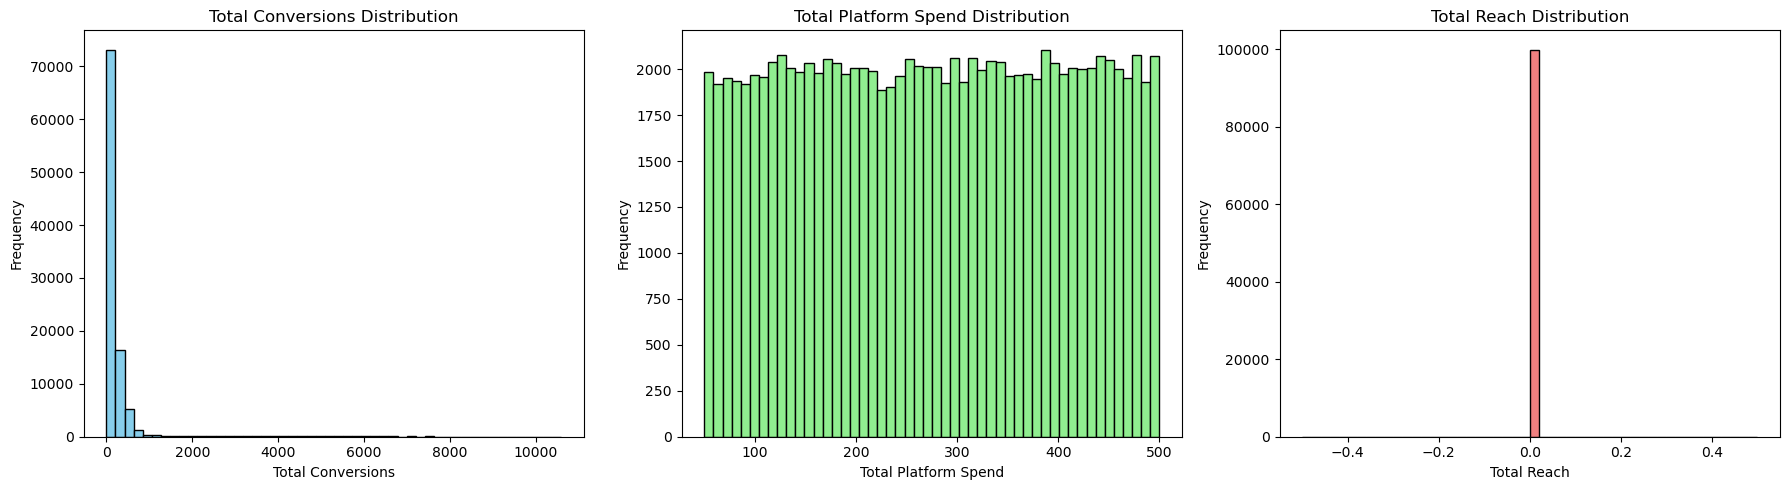

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total Conversions distribution
axes[0].hist(data['TotalConversions'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Total Conversions Distribution')
axes[0].set_xlabel('Total Conversions')
axes[0].set_ylabel('Frequency')

# Total Platform Spend distribution
axes[1].hist(data['TotalPlatformSpend'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Total Platform Spend Distribution')
axes[1].set_xlabel('Total Platform Spend')
axes[1].set_ylabel('Frequency')

# Total Reach distribution
axes[2].hist(data['TotalReach'], bins=50, color='lightcoral', edgecolor='black')
axes[2].set_title('Total Reach Distribution')
axes[2].set_xlabel('Total Reach')
axes[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

The histograms show that:

* Left: the distribution indicates that most of the ads have very low or zeros conversions and small number of ads obtaining very high conversions.
* Midle: the distribution shows that there is a concencentration of low values and again, some ads show higher spending
* Right: as I said in b-1, second point), most ads have zero reach, suggesting a significant portion of the ads did not reach many users, while a few had higher reach.

## C-2 CORRELATIONS with CTR: but let's Compute the CTR before 

In [58]:
data[data["TotalImpressions"].isna()==True] # to avoid deviding by 0;this could be seen via the results in a)

,DeliveryDateKey,PlatformLineItemName,CreativeKey,PlatformPosition,PublisherPlatform,AdvertiserAccountKey,AccountId,AccountName,AdId,AdName,...,TotalVideoContinuous2SecWatched,Total25PercentViewed,Total50PercentViewed,Total75PercentViewed,Total100PercentViewed,TotalReach,TotalConversions,TotalPlatformSpend,InterestsList,is_video


In [59]:
data["CTR"]=data['TotalClicks']/data['TotalImpressions'] # It could be multiplied by 100, but let's respect the given formulas

### Let's display the correlation of CTR with each variables

In [60]:
data_numeric=data.select_dtypes(include=["number"])
data_numeric = data_numeric.corr()
# Display the correlations with CTR
ctr_corr = data_numeric['CTR'].sort_values(ascending=False)
ctr_corr 

CTR                                 1.000000
TotalClicks                         0.885268
TotalConversions                    0.750910
TotalViews                          0.010590
AdsetId                             0.003352
CreativeKey                         0.002337
AdvertiserAccountKey                0.002284
PlatformCampaignKey                 0.000673
AgeMax                             -0.001263
TotalPlatformSpend                 -0.002148
TotalPlatformCost                  -0.002148
AdId                               -0.002833
PlatformAdvertiserKey              -0.004500
AccountId                          -0.005269
CampaignId                         -0.006143
TotalViewable                      -0.008029
TotalViewMeasurable                -0.008029
TotalImpressions                   -0.008029
AgeMin                             -0.047790
TotalViewTrackable                       NaN
TotalClientEligibleImpressions           NaN
TotalClientMeasurableImpressions         NaN
TotalPlatf

### Let's selecte only numerical columns that could be relevant to CTR and plot using a headmap. It could be nice, as it gives the correlation between the selected variables.

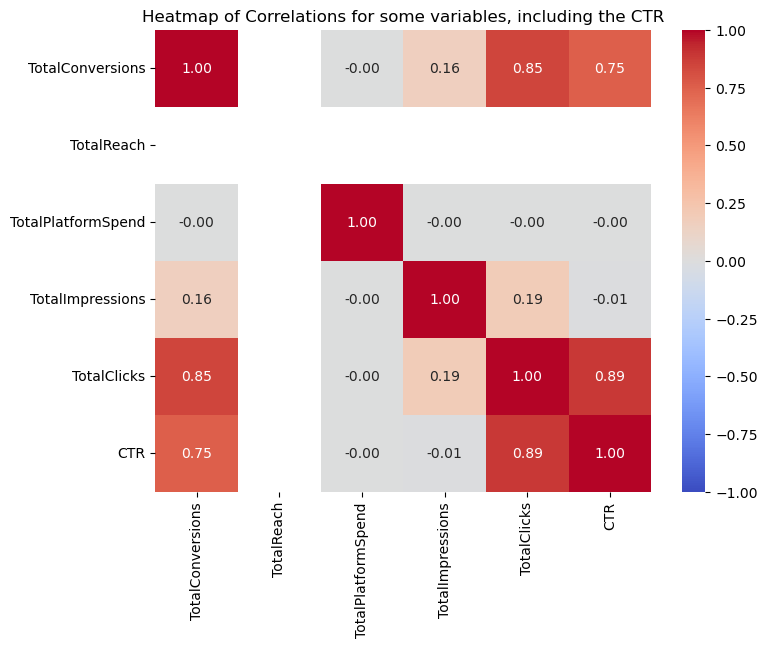

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

data_numerical_4CTR_corr = data[['TotalConversions', 'TotalReach', 'TotalPlatformSpend', 'TotalImpressions', 'TotalClicks','CTR']].corr()

# To create a heatmap of the filtered correlations (including CTR)
plt.figure(figsize=(8, 6))
sns.heatmap(data_numerical_4CTR_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# the title of the figure
plt.title("Heatmap of Correlations for some variables, including the CTR")
plt.show()


The headmp shows that:
* *CTR* is highly correlated with *TotalClick* (0.89) and *TotalConversions* (0.75),
* *TotalConversions* and *TotalClicks* are highly correlated with each other (0.85),
* *TotalImpressions* is correled with *TotalClicks* (0.19 but not negligeable),

## 2- Feature Engineering 

###  Let's classify the relevant features with respect to their type (categorical,numerical,....)

In [33]:
categorical_features = ["PlatformLineItemName","PublisherPlatform", "is_video","GenderType", "ParentalStatus", "Interests"]

numeric_features = ['TotalReach','TotalClicks','TotalImpressions', 'TotalConversions', 'TotalPlatformSpend', 'CTR']

date_features=["DeliveryDateKey"]

### 2-1  Engineering consideration to handle the features

###  2-1-1- For the categorical features: applying  one-hot encoding/label encoding to make them usage by a model

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [64]:
data["Interests"]

0            Beauty,Sports
1           Fashion,Travel
2            Beauty,Travel
3            Sports,Beauty
4           Fashion,Travel
               ...        
99995        Sports,Gaming
99996    Technology,Sports
99997       Travel,Fashion
99998       Beauty,Fashion
99999        Sports,Travel
Name: Interests, Length: 99863, dtype: object

In [63]:
# Label Encoding for Binary categorical features (is_video=(True,False))
label_encoder = LabelEncoder()
data['is_video'] = label_encoder.fit_transform(data['is_video'])

In [65]:
# Split the Interests column into Interests1 and Interests2 before using Encoding, as Interests is constitued of two string for colmuns
data[['Interests1', 'Interests2']] = data['Interests'].str.split(',', n=1, expand=True)

# Check the resulting columns
data[['Interests1', 'Interests2']].head()

,Interests1,Interests2
0,Beauty,Sports
1,Fashion,Travel
2,Beauty,Travel
3,Sports,Beauty
4,Fashion,Travel


In [66]:
# One-Hot Encoding for Multiclass Categorical Features : more than two classes
# Apply OneHotEncoding using pd.get_dummies
categorical_features = ["PlatformLineItemName","PublisherPlatform","GenderType", "ParentalStatus","Interests1","Interests2"]
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data = data.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [218]:
data.head()

,DeliveryDateKey,CreativeKey,PlatformPosition,AdvertiserAccountKey,AccountId,AccountName,AdId,AdName,AdsetId,AdsetName,...,Interests1_Fashion,Interests1_Gaming,Interests1_Sports,Interests1_Technology,Interests1_Travel,Interests2_Fashion,Interests2_Gaming,Interests2_Sports,Interests2_Technology,Interests2_Travel
0,2025-01-01,4216,INSTREAM_VIDEO,7965,7663,Account Rodriguez-Miller,4683,Ad 92,8216,Ad Set 97,...,0,0,0,0,0,0,0,1,0,0
1,2024-12-06,1626,RIGHT_HAND_SIDE,1742,6891,Account Andrade-Mendoza,7541,Ad 17,6228,Ad Set 7,...,1,0,0,0,0,0,0,0,0,1
2,2024-12-07,6955,RIGHT_HAND_SIDE,2114,9620,"Account Gomez, Stewart and Walker",1008,Ad 74,3105,Ad Set 31,...,0,0,0,0,0,0,0,0,0,1
3,2024-12-21,4343,INSTREAM_VIDEO,4635,7317,Account Martinez PLC,8448,Ad 17,5329,Ad Set 22,...,0,0,1,0,0,0,0,0,0,0
4,2025-01-05,2303,UNKNOWN,9449,8200,"Account James, Thomas and Wilson",5913,Ad 86,5413,Ad Set 17,...,1,0,0,0,0,0,0,0,0,1


###  2-1-2- For numerical values: scaling them to ensure that no single feature dominates the other because of the it's varying range

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Numerical features to scale
numeric_features_2scale = ['TotalReach', 'TotalClicks', 'TotalImpressions', 'TotalConversions', 'TotalPlatformSpend']

# Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
data[numeric_features_2scale] = scaler_minmax.fit_transform(data[numeric_features_2scale])
data[numeric_features_2scale]

,TotalReach,TotalClicks,TotalImpressions,TotalConversions,TotalPlatformSpend
0,0.0,0.004199,0.028867,0.001133,0.854619
1,0.0,0.054900,0.600867,0.047592,0.913554
2,0.0,0.073511,0.906978,0.038244,0.728505
3,0.0,0.013074,0.782267,0.003116,0.061601
4,0.0,0.063591,0.763733,0.006988,0.548168
...,...,...,...,...,...
99995,0.0,0.017310,0.190978,0.018225,0.976999
99996,0.0,0.053744,0.753556,0.028234,0.661637
99997,0.0,0.010635,0.151133,0.002361,0.237272
99998,0.0,0.006161,0.744800,0.000472,0.759150


### 2-1-3- Separatting the date_features into three different columns (DD/MM/YY) instead the date format or string one

In [68]:
data['DeliveryDateKey'] = pd.to_datetime(data['DeliveryDateKey'])
data['Day'] = data['DeliveryDateKey'].dt.day
data['Month'] = data['DeliveryDateKey'].dt.month
data['Weekday'] = data['DeliveryDateKey'].dt.weekday
data.drop(columns=['DeliveryDateKey'], inplace=True)  # Drop original date column
print(data[["Day","Month","Weekday"]])

       Day  Month  Weekday
0        1      1        2
1        6     12        4
2        7     12        5
3       21     12        5
4        5      1        6
...    ...    ...      ...
99995   31     12        1
99996   23     12        0
99997   16     12        0
99998   25     12        2
99999   22     12        6

[99863 rows x 3 columns]


## adding day, month and Weekday in the numerical features

In [69]:
numeric_features+=["Day","Month","Weekday"]
numeric_features

['TotalReach',
 'TotalClicks',
 'TotalImpressions',
 'TotalConversions',
 'TotalPlatformSpend',
 'CTR',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Day',
 'Month',
 'Weekday']

### 2-1-4 Consider interaction features: helping modoels to capture more informations that could be relevant for CTR predictions

*  Create interaction features using TotalReach and TotalConversions in order to obtain a more informative variable for the CTR. This is important since such a new variable may inform about the people who make a purchase after reaching (Conversion of purchase after  reaching)

In [73]:
data['Reach_Conversions_Interaction'] =  data['TotalConversions']/data['TotalReach'] 

* Create a new feature that divides TotalPlatformSpend by TotalImpressions in order to better understanding the relationship between spending and ad exposure

In [74]:
data['Reach_Conversions_Interaction'] = data['TotalPlatformSpend']/data['TotalImpressions']

## Adding the new columns into their category (numerical features

In [75]:
numeric_features+=["Reach_Conversions_Interaction","Reach_Conversions_Interaction"]

In [71]:
numeric_features

['TotalReach',
 'TotalClicks',
 'TotalImpressions',
 'TotalConversions',
 'TotalPlatformSpend',
 'CTR',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Day',
 'Month',
 'Weekday',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction']

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import numpy as np

# Feature Selection
"""
numeric_features.remove("CTR")
numeric_features.remove("
all_relevant_features=numeric_features + list(data.columns[data.columns.str.startswith('PlatformLineItemName')]) + \
         list(data.columns[data.columns.str.startswith('PublisherPlatform')]) +\
         list(data.columns[data.columns.str.startswith('GenderType')]) + \
         list(data.columns[data.columns.str.startswith('ParentalStatus')]) +\
         list(data.columns[data.columns.str.startswith('Interests1')]) +\
         list(data.columns[data.columns.str.startswith('Interests2')])
"""
       
all_relevant_features=['TotalReach',
 'TotalConversions',
 'TotalPlatformSpend',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Day',
 'Month',
 'Weekday',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'PlatformLineItemName_Line Item 10',
 'PlatformLineItemName_Line Item 100',
 'PlatformLineItemName_Line Item 11',
 'PlatformLineItemName_Line Item 12',
 'PlatformLineItemName_Line Item 13',
 'PlatformLineItemName_Line Item 14',
 'PlatformLineItemName_Line Item 15',
 'PlatformLineItemName_Line Item 16',
 'PlatformLineItemName_Line Item 17',
 'PlatformLineItemName_Line Item 18',
 'PlatformLineItemName_Line Item 19',
 'PlatformLineItemName_Line Item 2',
 'PlatformLineItemName_Line Item 20',
 'PlatformLineItemName_Line Item 21',
 'PlatformLineItemName_Line Item 22',
 'PlatformLineItemName_Line Item 23',
 'PlatformLineItemName_Line Item 24',
 'PlatformLineItemName_Line Item 25',
 'PlatformLineItemName_Line Item 26',
 'PlatformLineItemName_Line Item 27',
 'PlatformLineItemName_Line Item 28',
 'PlatformLineItemName_Line Item 29',
 'PlatformLineItemName_Line Item 3',
 'PlatformLineItemName_Line Item 30',
 'PlatformLineItemName_Line Item 31',
 'PlatformLineItemName_Line Item 32',
 'PlatformLineItemName_Line Item 33',
 'PlatformLineItemName_Line Item 34',
 'PlatformLineItemName_Line Item 35',
 'PlatformLineItemName_Line Item 36',
 'PlatformLineItemName_Line Item 37',
 'PlatformLineItemName_Line Item 38',
 'PlatformLineItemName_Line Item 39',
 'PlatformLineItemName_Line Item 4',
 'PlatformLineItemName_Line Item 40',
 'PlatformLineItemName_Line Item 41',
 'PlatformLineItemName_Line Item 42',
 'PlatformLineItemName_Line Item 43',
 'PlatformLineItemName_Line Item 44',
 'PlatformLineItemName_Line Item 45',
 'PlatformLineItemName_Line Item 46',
 'PlatformLineItemName_Line Item 47',
 'PlatformLineItemName_Line Item 48',
 'PlatformLineItemName_Line Item 49',
 'PlatformLineItemName_Line Item 5',
 'PlatformLineItemName_Line Item 50',
 'PlatformLineItemName_Line Item 51',
 'PlatformLineItemName_Line Item 52',
 'PlatformLineItemName_Line Item 53',
 'PlatformLineItemName_Line Item 54',
 'PlatformLineItemName_Line Item 55',
 'PlatformLineItemName_Line Item 56',
 'PlatformLineItemName_Line Item 57',
 'PlatformLineItemName_Line Item 58',
 'PlatformLineItemName_Line Item 59',
 'PlatformLineItemName_Line Item 6',
 'PlatformLineItemName_Line Item 60',
 'PlatformLineItemName_Line Item 61',
 'PlatformLineItemName_Line Item 62',
 'PlatformLineItemName_Line Item 63',
 'PlatformLineItemName_Line Item 64',
 'PlatformLineItemName_Line Item 65',
 'PlatformLineItemName_Line Item 66',
 'PlatformLineItemName_Line Item 67',
 'PlatformLineItemName_Line Item 68',
 'PlatformLineItemName_Line Item 69',
 'PlatformLineItemName_Line Item 7',
 'PlatformLineItemName_Line Item 70',
 'PlatformLineItemName_Line Item 71',
 'PlatformLineItemName_Line Item 72',
 'PlatformLineItemName_Line Item 73',
 'PlatformLineItemName_Line Item 74',
 'PlatformLineItemName_Line Item 75',
 'PlatformLineItemName_Line Item 76',
 'PlatformLineItemName_Line Item 77',
 'PlatformLineItemName_Line Item 78',
 'PlatformLineItemName_Line Item 79',
 'PlatformLineItemName_Line Item 8',
 'PlatformLineItemName_Line Item 80',
 'PlatformLineItemName_Line Item 81',
 'PlatformLineItemName_Line Item 82',
 'PlatformLineItemName_Line Item 83',
 'PlatformLineItemName_Line Item 84',
 'PlatformLineItemName_Line Item 85',
 'PlatformLineItemName_Line Item 86',
 'PlatformLineItemName_Line Item 87',
 'PlatformLineItemName_Line Item 88',
 'PlatformLineItemName_Line Item 89',
 'PlatformLineItemName_Line Item 9',
 'PlatformLineItemName_Line Item 90',
 'PlatformLineItemName_Line Item 91',
 'PlatformLineItemName_Line Item 92',
 'PlatformLineItemName_Line Item 93',
 'PlatformLineItemName_Line Item 94',
 'PlatformLineItemName_Line Item 95',
 'PlatformLineItemName_Line Item 96',
 'PlatformLineItemName_Line Item 97',
 'PlatformLineItemName_Line Item 98',
 'PlatformLineItemName_Line Item 99',
 'PublisherPlatform_Instagram',
 'PublisherPlatform_TikTok',
 'PublisherPlatform_Twitter',
 'GenderType_Male',
 'GenderType_Unknown',
 'ParentalStatus_Parent',
 'ParentalStatus_Unknown',
 'Interests1_Fashion',
 'Interests1_Gaming',
 'Interests1_Sports',
 'Interests1_Technology',
 'Interests1_Travel',
 'Interests2_Fashion',
 'Interests2_Gaming',
 'Interests2_Sports',
 'Interests2_Technology',
 'Interests2_Travel']

X = data[all_relevant_features]  # Feature matrix

y = data['CTR']  # Target variable (CTR)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check for NaN or infinite values in X
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
print("Checking for NaN values in X:")
print(X.isna().sum())  # Count missing values in each column

# Impute missing values using the median strategy
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Check again for missing values after imputation
print("Checking for missing values after imputation:")
print(pd.DataFrame(X_imputed).isna().sum())  # Ensure no missing values

# Step 2: Scale the features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Apply standard scaling (mean=0, std=1)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Checking for NaN values in X:
TotalReach                       0
TotalConversions                 0
TotalPlatformSpend               0
Reach_Conversions_Interaction    3
Reach_Conversions_Interaction    3
                                ..
Interests2_Fashion               0
Interests2_Gaming                0
Interests2_Sports                0
Interests2_Technology            0
Interests2_Travel                0
Length: 128, dtype: int64
Checking for missing values after imputation:
0      0
1      0
2      0
3      0
4      0
      ..
123    0
124    0
125    0
126    0
127    0
Length: 128, dtype: int64


In [79]:
all_relevant_features

['TotalReach',
 'TotalConversions',
 'TotalPlatformSpend',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Day',
 'Month',
 'Weekday',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'Reach_Conversions_Interaction',
 'PlatformLineItemName_Line Item 10',
 'PlatformLineItemName_Line Item 100',
 'PlatformLineItemName_Line Item 11',
 'PlatformLineItemName_Line Item 12',
 'PlatformLineItemName_Line Item 13',
 'PlatformLineItemName_Line Item 14',
 'PlatformLineItemName_Line Item 15',
 'PlatformLineItemName_Line Item 16',
 'PlatformLineItemName_Line Item 17',
 'PlatformLineItemName_Line Item 18',
 'PlatformLineItemName_Line Item 19',
 'PlatformLineItemName_Line Item 2',
 'PlatformLineItemName_Line Item 20',
 'PlatformLineItemName_Line Item 21',
 'PlatformLineItemName_Line Item 22',
 'PlatformLineItemName_Line Item 23',
 'PlatformLineItemName_Line Item 24',
 'PlatformLineItemName_Line Item 25',
 'PlatformLineItemName_

In [80]:
X_scaled

array([[ 0.        , -0.33345711,  1.22232127, ...,  2.2203844 ,
        -0.44647448, -0.4491817 ],
       [ 0.        ,  0.29268827,  1.4266151 , ..., -0.45037247,
        -0.44647448,  2.22627055],
       [ 0.        ,  0.1666956 ,  0.78515403, ..., -0.45037247,
        -0.44647448,  2.22627055],
       ...,
       [ 0.        , -0.31691262, -0.91767978, ..., -0.45037247,
        -0.44647448, -0.4491817 ],
       [ 0.        , -0.34236569,  0.89138374, ..., -0.45037247,
        -0.44647448, -0.4491817 ],
       [ 0.        , -0.2278269 , -0.65661197, ..., -0.45037247,
        -0.44647448,  2.22627055]], shape=(99863, 128))

### 3- Modelling

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

##  Random Forest Regressor

In [82]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Random Forest - R²: {rf_r2}, MAE: {rf_mae}, MSE: {rf_mse}")

Random Forest - R²: 0.8476004221057452, MAE: 0.029157064333735463, MSE: 0.007034640492834435


## Gradient Boosting Regressor

In [83]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print(f"Gradient Boosting - R²: {gb_r2}, MAE: {gb_mae}, MSE: {gb_mse}")


Gradient Boosting - R²: 0.8315734594444324, MAE: 0.0291060284111543, MSE: 0.007774432046539692


## Linear Regression

In [84]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate Linear Regression
lr_predictions = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print(f"Linear Regression - R²: {lr_r2}, MAE: {lr_mae}, MSE: {lr_mse}")

Linear Regression - R²: 0.5550450764649352, MAE: 0.0554679423679403, MSE: 0.020538757166097214


In [86]:
print(f"Random Forest - R²: {rf_r2}, MAE: {rf_mae}, MSE: {rf_mse}")
print(f"Gradient Boosting - R²: {gb_r2}, MAE: {gb_mae}, MSE: {gb_mse}")

print(f"Linear Regression - R²: {lr_r2}, MAE: {lr_mae}, MSE: {lr_mse}")


Random Forest - R²: 0.8476004221057452, MAE: 0.029157064333735463, MSE: 0.007034640492834435
Gradient Boosting - R²: 0.8315734594444324, MAE: 0.0291060284111543, MSE: 0.007774432046539692
Linear Regression - R²: 0.5550450764649352, MAE: 0.0554679423679403, MSE: 0.020538757166097214


## END: THANK YOU FOR THE REVIEW

In [87]:
l=list(range(5))

In [88]:
l

[0, 1, 2, 3, 4]

In [89]:
l.remove(3)
l

[0, 1, 2, 4]